# How to use the module?
(see dofitPython_functions.py for more details):
- Use the function 'MAIN_FIT' to fit a PNSD and to let the algorithm decide what the best number of modes is
- The main function arguments are:
    - 'Dp': the diameters of your PNSD (in meters!)
    - 'distrib': your PNSD (concentration for each diameter bin)
- And some default arguments that can be ignored if you want to:
    - 'TOL_1N' and 'TOL_2N': parameters to help choosing the number of modes
    - 'finescanning': 'yes' to get more accurate scanning of the modes, 'no' otherwise ('no' option speeds up the computation)  

    
Théodore Khadir, August 2022

In [1]:
# import the functions from the fitting module
from dofitPython_functions import *

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fit particle number size distribution (PNSD) with 3 modes

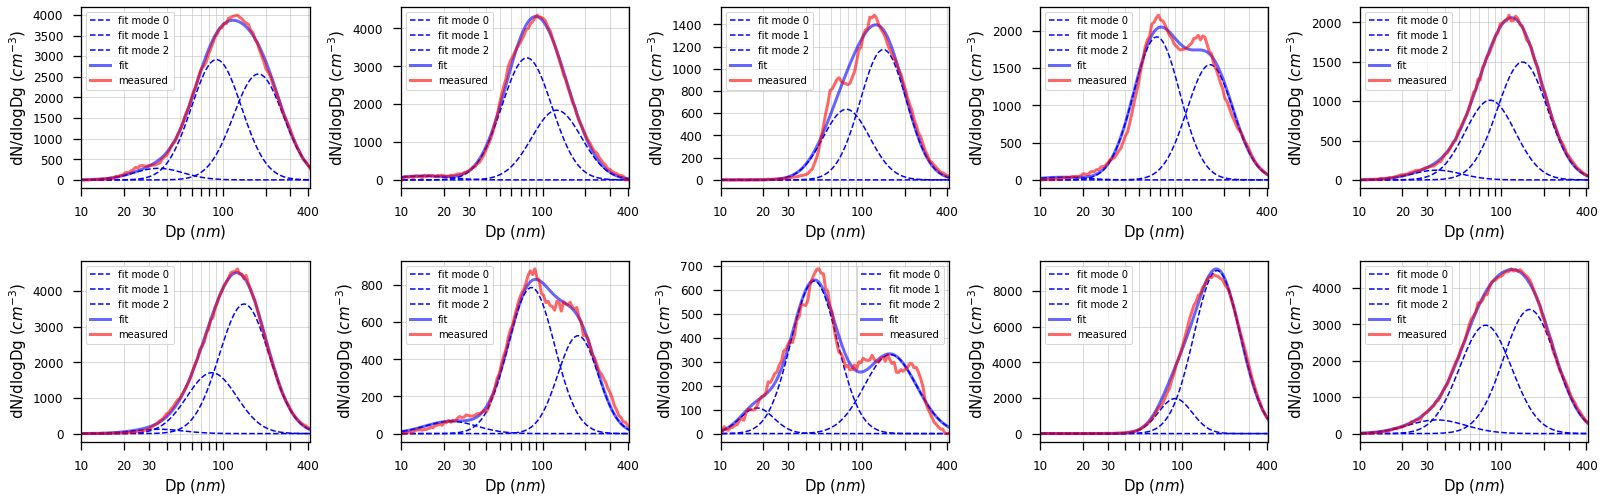

In [2]:
# load a test dataset
path = '/Users/theodorekhadir/Documents/PHD/Data/Stations/pico espejo/test_pnsd.csv'
df = pd.read_csv(path, delimiter=',', header=0)

# df contains 10 PNSDs, columns are the different diameter sizes
df = df.astype(float) # data needs to be float

Dp_ = df.columns.tolist()
Dp_ = np.array(Dp_, dtype=float) # list of diameter sizes

Dp = Dp_*1e-9 # the function needs diameter in meters

# initialize figure
fig = plt.figure(num=None, figsize=(27,8))

# plot the original PNSDs and fitted modes associated using the function DO_FIT_400_3M that fits 3 modes only 
# (see dofitPython_functions.py)
for i in range(0,10):
    ax = plt.subplot(2, 5,i+1)
    distrib = df.values[i]
    estimate = model_distrib_3M(Dp, distrib)
    plot_fit(Dp_, distrib, estimate, ax)

# adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Let the algorithm decide what the best number of modes is
- based on overlapping modes
- based on root mean square error

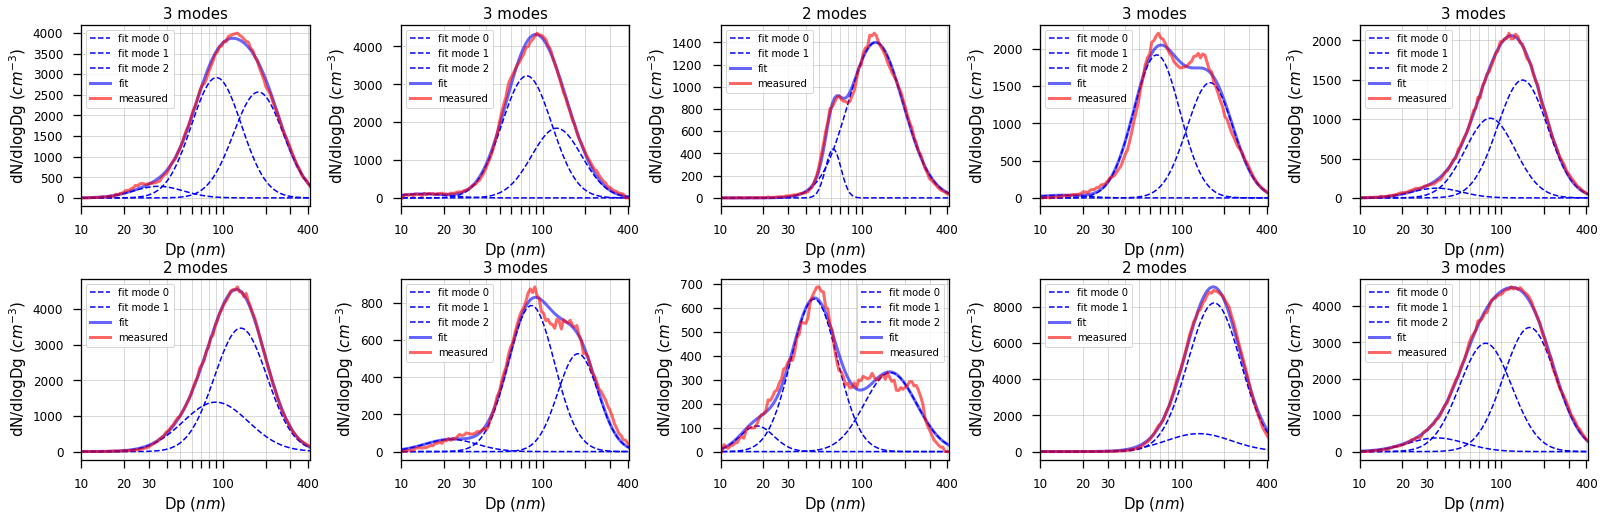

In [2]:
# load a test dataset
path = '/Users/theodorekhadir/Documents/PHD/Data/Stations/pico espejo/test_pnsd.csv'
df = pd.read_csv(path, delimiter=',', header=0)

# df contains 10 PNSDs, columns are the different diameter sizes
df = df.astype(float) # data needs to be float

Dp_ = df.columns.tolist()
Dp_ = np.array(Dp_, dtype=float) # list of diameter sizes

Dp = Dp_*1e-9 # the function needs diameter in meters

# initialize figure
fig = plt.figure(num=None, figsize=(27,8))

# plot the original PNSDs and fitted modes associated using the function DO_FIT_400_3M that fits 3 modes only 
# (see dofitPython_functions.py)
for i in range(0,10):
    ax = plt.subplot(2, 5,i+1)
    distrib = df.values[i]
    estimate = model_distrib(Dp, distrib)
    plot_fit(Dp_, distrib, estimate, ax)
    ax.set_title('{} modes'.format(len(estimate)), fontsize=15)

# adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)